# PHAS0007: Session 4
# Plotting with Matplotlib

Author: Louise Dash (louise.dash@ucl.ac.uk)
Last updated: 17.10.2019

## Learning objectives

By the end of this session, you should:

* be able to produce a simple plot using the matplotlib module.
* know how to produce a plot in a suitable format for your lab book and formal report.



# <a id="toc"></a>Contents

As this notebook is quite long, here are some links to help you find the information you're looking for quickly. Each section also has a link to return to this table of contents.


* [The basics](#basics)
* [Plotting two or more lines together](#twoormorelines)
* [Customising the style of your plots](#styles)
* [Loading data from a file with np.loadtxt](#loadtxt)
* [Specifying the plot style](#plotstyle)
* [How to plot errorbars](#errorbars)
* [Outputting your plot to a file](#outputtofile)
* [Example: Plotting an ellipse](#ellipse)
* [Example: Histograms](#histogram)
* [Lab book checklist](#labbookchecklist)
* [Formal report checklist](#formalreportchecklist)
* [Assessed task](#task)
* [Where to get more information](#moreinfo)



#  <a id="basics"></a>The basics

Using Matplotlib is a great way to interact with and present your data. In this session we'll go through how to plot functions and data files, and how to best present the data. We'll be doing this within a Jupyter notebook, but everything here will also work in stand-alone python code.

In following sessions we'll look at how to analyse data graphically using least squares fits, and how to interact with data.

#### Why not just plot the data with Excel?

Once you get used to it, you'll find that Matplotlib is just as easy to use (if not easier) than Excel graphs, especially when you need to include error bars and/or mathematical notation. Moreover, the default plot produced by Matplotlib nearly always looks better than the default Excel plot!

The first thing we need to do is to import the matplotlib pyplot module. We'll also need to import numpy, just as before. Remember, to run each cell you need to press `SHIFT+ENTER`.

In [1]:
# The line below tells the notebook to produce interactive plots
# With Ipython 5.0 or later this needs to be done *before* importing matplotlib
# or it will default to the non-interactive %matplotlib inline
%matplotlib notebook
# note that you can't add a trailing # comment after a %magic command

# If you don't need the interactive features like zoom and pan
# or you're working on a slow computer, you can use this instead:
#%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

We also need some data to plot. Even if we're plotting a function, we need to calculate that function at a discrete set of points. We'll use one of the numpy array functions we met last week, linspace, to generate numbers for the x-values, and then calculate the corresponding y-values for a simple function - in this case $\sin(x)$.

In [2]:
x = np.linspace(0,2*np.pi,100) # 100 points between 0 and 2pi
y = np.sin(x)                  # nb numpy trig functions are in radians by default

Obviously our plot will also need axis labels and a title. Note how we enclose text strings inside quotation marks here.

<IPython.core.display.Javascript object>


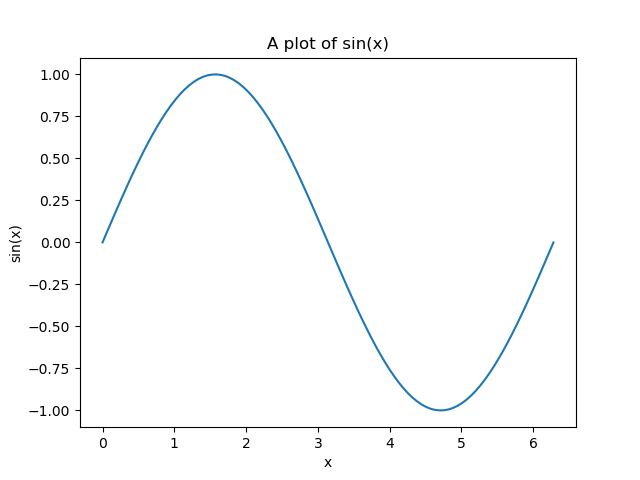

Text(0.5, 1.0, 'A plot of sin(x)')

In [4]:
# now for the plot itself
plt.figure() # start a new figure
plt.plot(x,y) # plot the array "x" on the x axis and "y" on the y-axis
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('A plot of sin(x)')

The little buttons at the bottom (as long as you are using `%matplotlib notebook`) allow you to interact with the plot by zooming in on an area of interest and/or panning the field of view.

Remember, this looks like a continuous function, but in reality it's a series of straight line segments between discrete points. Try zooming in, or changing the number of points from 100 to 10 to see the difference!

[_(Return to table of contents)_](#toc)
##  <a id="twoormorelines"></a>Plotting two (or more) lines together


Sometimes we may want to plot two lines together on the same graph. To do this, we just add a new plot command for the new line. When you have more than one line, you'll generally need a legend as well. Look at this code to see how to do this:

<IPython.core.display.Javascript object>


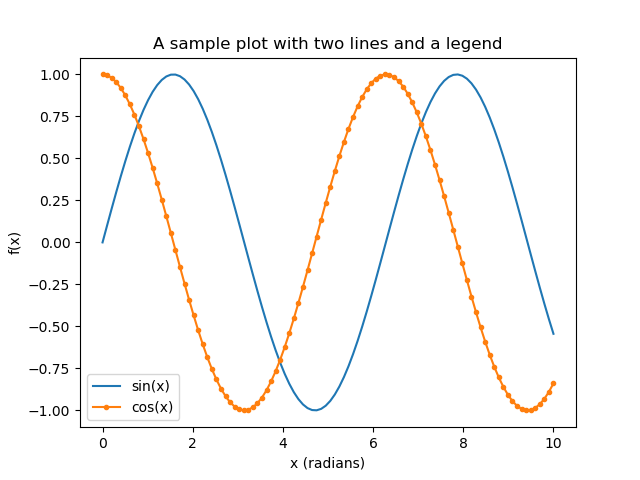

In [5]:
x = np.linspace(0,10,100) # set up array of 100 x-values from 0-10
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure() # start a new figure
plt.plot(x,y1,label="sin(x)")      # plot the first line using the default line, no points, and set the label
plt.plot(x,y2,".-",label="cos(x)") # plot the second line using line and small points 
plt.xlabel('x (radians)')          # put a label on the x axis, including units
plt.ylabel('f(x)')                 # put a label on the y axis
plt.title('A sample plot with two lines and a legend') # a title for the plot
plt.legend(loc="best")  # this will try and guess the best location for the legend...
# ...or try "lower left, center right, etc. For example:
#plt.legend(loc="upper right")


[_(Return to table of contents)_](#toc)
## <a id="styles"></a> Customising the style of your plots


You may find that you want to change the whole visual style of your plots, and there are a wide variety of styles you can choose from.

Running the following cell will list all available styles, which you can preview at the matplotlib [style sheets reference page](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html).

In [6]:
print(plt.style.available) # list of all available styles

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


Which you choose will depend on several factors, including where you intend to use the plot (viewing on a screen? / projected on a wall? / printed copy?) as well as personal preference. 

For example, the cell below sets the style to 'seaborn-colorblind' for this and all subsequent plots, and then plots the same data as the cell above. This style is a particularly useful alternative to the default because, as its name suggests, it uses a palette that is distinguishable to those with the most common forms of colour blindness.

(n.b. if you experiment with these styles, you will probably want to restart the kernel and re-run the code in the notebook to ensure the settings are consistent).

<IPython.core.display.Javascript object>


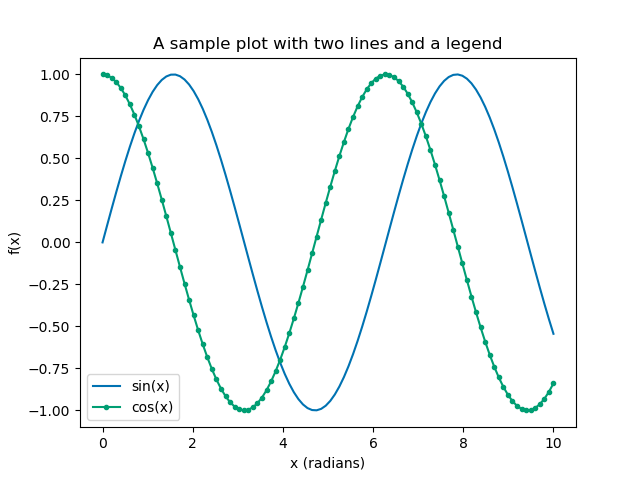

In [7]:
plt.style.use('seaborn-colorblind')# change the style to make plots accessible for colourblind users
plt.figure()                       # start a new figure
plt.plot(x,y1,label="sin(x)")      # plot the first line using the default line, no points, and set the label
plt.plot(x,y2,".-",label="cos(x)") # plot the second line using line and small points 
plt.xlabel('x (radians)')          # put a label on the x axis, including units
plt.ylabel('f(x)')                 # put a label on the y axis
plt.title('A sample plot with two lines and a legend') # a title for the plot
plt.legend(loc="best")  # this will try and guess the best location for the legend...

[_(Return to table of contents)_](#toc)
# <a id="loadtxt"></a>Loading a dataset from a file


Usually we'll want to plot some data we already have, e.g. from a lab experiment. We'll need a way to get this data into a plottable format, i.e. arrays like the ones we created for x and y above. There are a few ways to do this.

* Entering the data by hand straight into Python, using the `np.array()` function. This is generally inefficient and you won't want to do this.

* Entering the data into another source and then loading it into Python:
    - You can use Excel, and then save the Excel file as a .csv (Comma Separated Values) file, which is a plain text format. This is a good choice if you want to do some data manipulation before analysing it.
    - You can use a text editor like Notepad or the inbuilt Jupyter Notebook text file editor to enter the data, and save it as a .txt file. Useful if you only have a few data points and don't want to fire up the full force of Excel.

For this example, I created a text file called "`sampledata.txt`" in Notepad with three columns of data, separated by tabs, which represent the x-values (in this case voltage), the y-values (in this case current) , and the error in the y-values. 

Make sure you've downloaded this file from Moodle, and put it in the same directory as this notebook. Open the file in the Jupyter text editor (click on the file in the directory listing tab) or Notepad.

You will be able to see that the data file has several header lines, which are ignored by `np.loadtxt` as they are commented out with #s - but these header lines nonetheless include important information about where the data comes from, what each column represents, and what units are used.


To get this data into Python, the easiest way is to use the `np.loadtxt()` function , which we already met last week. This time though, we have *three* columns of data, so now we need to "unpack" the data into three separate arrays, like this:

In [8]:
#unpack=True unpacks each column into a separate array.
xdata, ydata, yerror = np.loadtxt("S4_sampledata.txt", unpack=True) 
print("our xdata: ", xdata)
print("our ydata: ", ydata)
print("errors on the y-values: ", yerror)

our xdata:  [ 0. 10. 20. 30. 40. 50. 60. 70. 80.]
our ydata:  [ 0.  11.3 20.4 28.7 39.8 50.7 59.5 71.2 80.5]
errors on the y-values:  [5. 5. 5. 5. 5. 5. 5. 5. 5.]


The full documentation for `np.loadtxt()` is here: http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html Read it to find out how to ignore rows with header information, change the delimiter from tab to comma, or pick which columns you want to load. By default, lines starting with the comment `#` character are ignored, so it's useful to use this for column headers.

[_(Return to table of contents)_](#toc)
## <a id="plotstyle"></a>Specifying the plot style


When we're plotting data, we usually want to plot it as points rather than as a line. By default, matplotlib will plot a line, but it's easy to plot points instead. You can specify both the colour and style of the datapoints using a short abbreviation - in this example small points ('.') - note that this is enclosed in quotation marks:

<IPython.core.display.Javascript object>


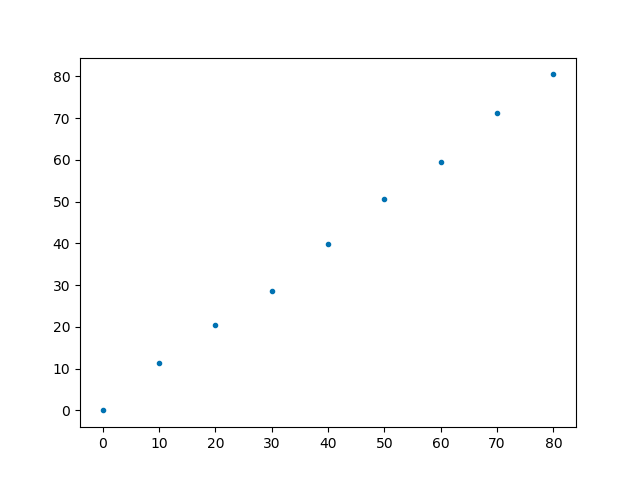

In [9]:
plt.figure()
plt.plot(xdata,ydata, '.' ) # '.' specifies small points

The abbreviations for the marker styles are reasonably intuitive, so they're fairly easy to remember:

* '-'	solid line style
* '--'	dashed line style
* '-.'	dash-dot line style
* ':'	(a colon) dotted line style
* '.'	point
* 'o'	circle
* 'v'	triangle_down
* '*'	star
* '+'	plus
* 'x'	x

There's a full list of the possibilities here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

It's also possible to specify colours manually (and you can see how to do this in the link above) but in general it is recommended to stick to one of the pre-generated styles.

[_(Return to table of contents)_](#toc)
## <a id="errorbars"></a>How to plot error bars


We didn't include any error bars in the plot above. In fact, to include errorbars we need to use the `errorbar()` command **_instead of_** the `plot()` command (this is not necessarily intuitive, as you might think you'd use the `errorbar()` **_and_** `plot()` commands together). 

Note how we do this:
* We specify the xdata and ydata as before
* The y-errorbars are specified with the `yerr` keyword (hopefully you can thus use logic to deduce what to do if you want x-errorbars)
* We have a `fmt` statement to specify the point style (here blue circles). If you leave this out, the default is to draw a straight line between the datapoints, and in general you *don't* want this.

<IPython.core.display.Javascript object>


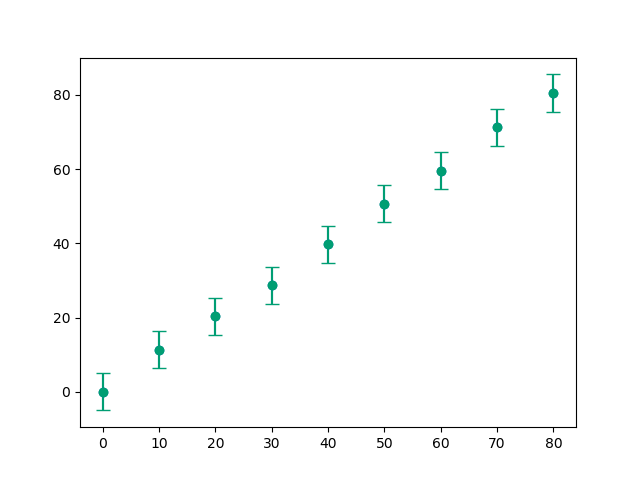

<ErrorbarContainer object of 3 artists>

In [10]:
plt.figure()
plt.errorbar(xdata,ydata,yerr=yerror,fmt='o')

By default the new version of matplotlib doesn't include "caps" at the ends of the errorbars, if you want them you have to specify the size 

In [11]:
# if we don't include 
#plt.figure() 
# here it will update the last figure rather than generating
# a new one - sometimes useful!
# You'll need to scroll back up to the last figure to see the effect of this.

plt.errorbar(xdata,ydata,yerr=yerror,capsize=5,fmt='o') # capsize sets length of caps in points

<ErrorbarContainer object of 3 artists>

To see how we can combine these, we'll:
* Add a straight line $y=x$ through the datapoints (we'll come on to how to *fit* a line through the data next session)
* Specify the range for the x and y axes
* Add all the other things our plot needs: labels, titles, legends, gridlines, etc
* Note that (in general), the order of the `plt.*` commands doesn't matter - but they are executed in sequence, so it's aesthetically better to have the grid command before the data, so that it gets plotted underneath, etc., as in the example below.

<IPython.core.display.Javascript object>


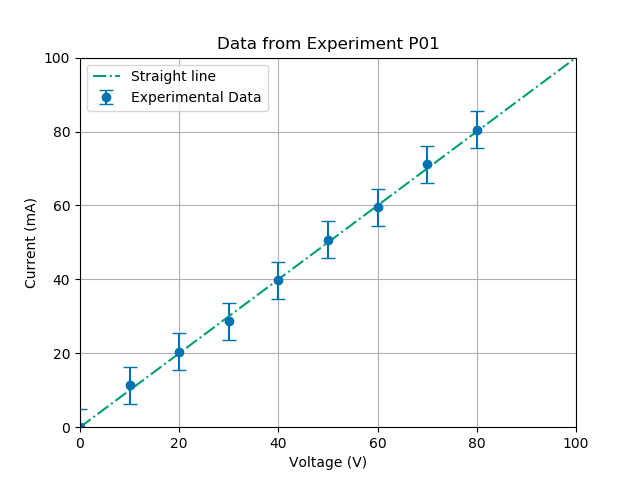

In [12]:
# We'll use a new figure for this
plt.figure()

# first generate data for the straight line y = x
# we'll create two separate arrays for this
xline = np.linspace(0,100,2) # only need two points for a straight line
yline = xline

# Now for the plot commands:
#   First the data with circles and errorbars:
#   note that we don't use plt.plot for this!
plt.errorbar(xdata,ydata,yerr=yerror,capsize=5,fmt='o',label='Experimental Data') 
#   Then the straight line, with no datapoints.
plt.plot(xline,yline, '-.', label='Straight line') # '-.' here gives a dash-dot line...
                                              # c.f. '.-', which gives a small data points (.) with solid line (-) 

plt.grid(True)  # Add gridlines
plt.xlim(0,100) # set xrange to be from 0 to 100
plt.ylim(0,100) # set the y range to be from 0 to 100
plt.title('Data from Experiment P01') # a suitable concise title
plt.xlabel('Voltage (V)')     # don't forget the axis labels!
plt.ylabel('Current (mA)')
plt.legend(loc='best');   # including a ; at the end will suppress the <matplotlib.Message> text etc

# outputting to a file - see the section below
#plt.savefig('Myplot.png') # saves to a PNG file
#plt.savefig('Myplot.png', dpi=300) # saves to a PNG file with a higher resolution
#plt.savefig('Myplot.pdf') # saves to a PDF file

[_(Return to table of contents)_](#toc)
###  <a id="outputtofile"></a>Outputting your plot to a file

You can use the disk icon (if using %matplotlib notebook) to open up the plot as a png image in a new tab, which you can then save.

You can also use the `savefig()` command to save your plot to a file for printing or including in another document (eg. Word), which gives you more control over the way the plot image is produced. The full documentation for this is here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig

Note that you need to put the `savefig()` command in the same cell as the other plot commands if you're using a Jupyter Notebook. Some sample commands are in the cell above, commented out - try uncommenting each of them in turn to see the results. The files will be saved in the same folder as your Jupyter Notebook.

You can save in a number of formats, but generally you'll want to save as either a .png or .pdf file. The file type can be autodetermined from the filename extension, as in these examples. You'll probably also find that all the default settings work OK, but if you want to change the resolution of a png (for better quality), try changing the dpi (dots per inch) setting, as above.



[_(Return to table of contents)_](#toc)
##  <a id="ellipse"></a>A more complex example: Plotting an ellipse


Finally, here's a rather more complicated example, where we plot the parametric form of an ellipse, starting from three parameters: two vertices of the ellipse, and the eccentricity of the ellipse.

We'll start from the standard equation for an ellipse:
$$
\left(\frac{x}{a}\right)^2 + \left(\frac{y}{b}\right)^2 = 1,
$$
where $a$ and $b$ are the major and minor radii (or the semi-major and semi-minor axes), put it into the parametric form:
$$ x(t) = a \cos t, \\
y(t) = b \sin t, 
$$
and then rotate and translate the ellipse.

This is the code. Try changing the input parameters. You may find this useful some day!

<IPython.core.display.Javascript object>


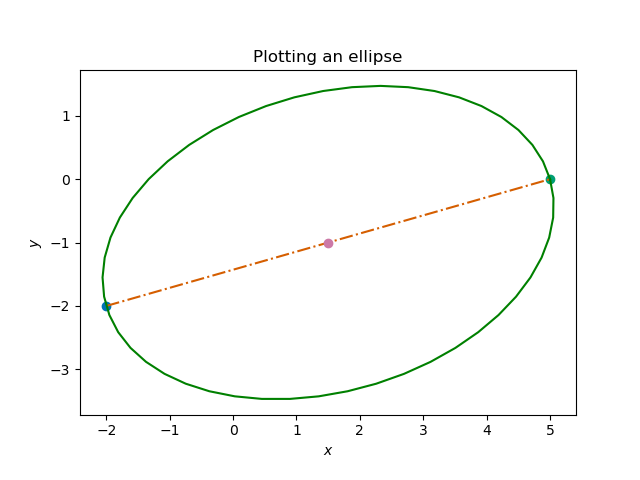

In [13]:
# (x1,y1) and (x2,y2) are the coordinates of the two vertices of the ellipse's major axis
x1, y1 = -2, -2 # try changing these values!
x2, y2 = 5, 0

# we also specify the eccentricity (0 < ecc < 1)
ecc = 0.75 # ecc = 0 gives a circle.

# calculate the major and minor radii (semi-major and semi-minor axes), a and b:
a = 0.5*np.sqrt((x2-x1)**2+(y2-y1)**2)
b = a**np.sqrt(1-ecc**2)
#print("a is", a, "b is", b)

# set up parametric equation for all values of 0 < t < 2*pi
t = np.linspace(0,2*np.pi)
xx = a*np.cos(t)
yy = b*np.sin(t)

# calculate the rotation of the ellipse
w = np.arctan2(y2-y1,x2-x1) # np.arctan2 chooses the correct quadrant, cf np.arctan
# translate and rotate our X and Y to calculate the points of the ellipse
x = (x1+x2)/2 + xx*np.cos(w) - yy*np.sin(w)
y = (y1+y2)/2 + xx*np.sin(w) + yy*np.cos(w)

# plot the ellipse

plt.figure()
plt.axes(aspect='equal')            # force the aspect ratio of the plot to be 1:1 ('equal' can be changed to a number)
plt.plot(x1,y1, "o")               # first vertex
plt.plot(x2,y2, "o")               # second vertex
plt.plot([x1,x2],[y1,y2], "-.")    # major axis: note how start/end points given in [], xpoints then ypoints
plt.plot((x2+x1)/2,(y2+y1)/2, "o") # centre point of ellipse
plt.plot(x,y,'g-')                  # the ellipse itself.
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Plotting an ellipse");

[_(Return to table of contents)_](#toc)
##   <a id="histogram"></a>Final example: histograms 


It's also useful to be able to plot histograms. We'll be covering this in more depth in PHAS0029 (for those of you who will take it) but in the meantime here's a quick example, again using the "wheat spikes" example from the data analysis lectures. You can find the full documentation for `plt.hist()` at https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
spike_data = np.loadtxt("wheatdata.txt") # load the data from the same file as session 3

plt.figure()
# see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html for full documentation
plt.hist(spike_data, bins=15, range=(0,650), edgecolor='black')
plt.xlabel('no. of spikes')
plt.ylabel('occurences')
plt.title('Histogram of wheat field data');

# Preparing plots for your lab book or formal report

When you're using this in lab classes, remember there are specific rules and guidelines for how your plots should look, depending on whether you're preparing your plot to stick into your lab book or for part of a formal report. Full guidelines are given in Section 7 (page 22) of the [Data Analysis and Statistics Handbook](https://moodle.ucl.ac.uk/mod/resource/view.php?id=1388451) but here are some basic checklists to help you make sure you haven't forgotten anything:

[_(Return to table of contents)_](#toc)
##  <a id="labbookchecklist"></a>Lab book checklist


* The axes are labelled, complete with units. 
* Use `plt.grid(True)` to include a grid, to make the data easier to decipher
* If appropriate, you have included error bars. If you don't include error bars because they'd be smaller than the data symbols, say so in the caption.
* If you have more than one dataset on the same plot, include a legend, and make sure the legend is positioned so that it doesn't cover up important data!
* All components should be an appropriate size for printed output (generally with Matplotlib the default settings are good, but check this in case!)
* You've chosen appropriate line and point styles for a printout - if you are printing the plot on a black and white printer, don't rely on different colours to distinguish between datasets! There are both colour and mono printers in the labs, but the colour prints will use more of your [print quota](https://www.ucl.ac.uk/isd/services/print-copy-scan/about/print-charging).

* You will need a (handwritten) caption in your lab book. However it's good practice to include a title on your plot as well so that when you look at the *electronic* version of the plot you know what it refers to! If you want to, you can crop this off the final printout with scissors before sticking it into your lab book.


[_(Return to table of contents)_](#toc)
##  <a id="formalreportchecklist"></a>Formal report checklist

* Axes are labelled, complete with units.
* Grid is present
* If appropriate, you have included error bars. If you don't include error bars because they'd be smaller than the data symbols, say so in the caption.
* If you have more than one dataset on the same plot, include a legend, and make sure the legend is positioned so that it doesn't cover up important data!
* All components are an appropriate size for the two-column formal report layout - you may need to change the font sizes.
* Appropriate line and point styles so that the data is clearly legible when it's printed at the size it appears on the formal report.
* Don't include a title for a formal report - instead use a figure caption within the document. 

[_(Return to table of contents)_](#toc)
#  <a id="task"></a>Assessed task for this session



This is an exercise in plotting data from a laboratory experiment.

The data is from an x-ray diffraction experiment similar to one that some of you may do next year in PHAS0028 (Experiment A10). A beam of x-rays is scattered from a crystal sample and the intensity of the scattered x-rays is measured at various angles. You do not need to know anything about x-ray diffraction to plot this data, but if you are interested you can find a quick summary of the theory here: http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/bragg.html and experimental setup here: http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/bragg.html#c2, with more detail here: http://en.wikipedia.org/wiki/Bragg%27s_law .

## What you need to do:

* Download the two data files from the Moodle page for this session. These were generated in Microsoft Excel and saved in .csv (comma separated values) format. In both files, the first column (x-data) is twice the diffraction angle (2 theta, in degrees) and the second column (y-data) is the number of counts recorded per second.

* Create a new Jupyter Notebook. Remember to:
   * include your name in the filename;
   * start with a suitable title and an introductory paragraph; 
   * use text cells to explain what you're doing as you go along. 
   * Include informative, concise comments in the code cells.

* Import the data into your Notebook like we did for the sample file above, and plot the data as two sets of data on a single plot. The styles etc are up to you - experiment as much as you like, but choose something appropriate for the final version.

* You'll need to consider whether or not to use a continuous line, data points (and if so which style/size), or both. Which is most appropriate here, and why? **Explain your choice in a text cell.**

* Include axis labels, a legend, and a title. 

* Your notebook should also include  a line that uses the `savefig` function to save the plot in a suitable form for printing out and sticking into a lab book. 

### Hints:
* Look at the data file in the Jupyter text file viewer (or Notepad, if you prefer) to see what format it is in before trying to import it (if you open it in Excel, it just looks like a spreadsheet, which doesn't really help you decipher the format!) 
* **DO NOT EDIT THE DATA FILES, CHANGE THEM IN ANY WAY, OR RENAME THE FILES**.
* Read the `loadtxt` help at http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html carefully, in particular how to set the delimiter.
* You can find information on typesetting maths / greek letters in Matplotlib here: http://matplotlib.org/users/mathtext.html . In general, this works using the same LaTeX commands and abbreviations as when you are entering maths/Greek letters in text cells.
* Having problems with typesetting a lower case theta? Have a look at this: https://stackoverflow.com/questions/10370760/matplotlib-axis-label-theta-does-not-work-theta-does
* **Don't** use unicode for variable names. Yes, it (usually) works. But it also, at best, makes your code less portable, and at worst, may not work at all on another system.


[_(Return to table of contents)_](#toc)
#   <a id="moreinfo"></a>Where to get more information

You can see lots more examples from matplotlib in Chapter 3 of [Christian Hill "Learning Scientific Programming with Python"](https://ucl.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=A5C87FD54A62F5291E945E3CFACB2004.app05.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=5065058460004761&institutionId=4761&customerId=4760), although please use 

     import numpy as np
     import matplotlib.pyplot as plt

and [not "import pylab"](http://carreau.github.io/posts/10-No-PyLab-Thanks.html).

### ...and even more (for those who are interested in plotting beyond the scope of what we cover in PHAS0007):

There are lots of impressive matplotlib examples available - for some spectacular ones take a look at IPython/Jupyter developer Matthias Bussonnier's page: http://carreau.github.io/posts/24-Viridisify.html

You can also use Matplotlib in an object-oriented way, Chapter 7 of [Christian Hill "Learning Scientific Programming with Python"](https://ucl.userservices.exlibrisgroup.com/view/action/uresolver.do;jsessionid=A5C87FD54A62F5291E945E3CFACB2004.app05.eu02.prod.alma.dc03.hosted.exlibrisgroup.com:1801?operation=resolveService&package_service_id=5065058460004761&institutionId=4761&customerId=4760) has a very comprehensive coverage of this.

You may want to also have a look at the Matplotlib tutorial at https://www.python-course.eu/matplotlib.php which has some very good examples of how to lay out subplots etc.

For those of you interested in data visualisation, and in particular more on what seaborn can do, try https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-3-69647c19bf2 and https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2 for starters!